In [1]:
import numpy as np

In [2]:
import pandas as pd


In [3]:
import matplotlib.pyplot as plt

In [4]:
from xgboost import plot_importance

In [5]:
import seaborn as sns

In [6]:
import os

In [7]:
# importing libraries
from sklearn.preprocessing import StandardScaler as ss

In [8]:
#dimentional reductionality
from sklearn.decomposition import PCA

In [9]:
#libraries for data splitting
from sklearn.model_selection import train_test_split

In [10]:
#libraries for model pipelining
from sklearn.pipeline import Pipeline

In [11]:
from sklearn.pipeline import make_pipeline

In [12]:
#libraries for model parameter tuning
from sklearn.model_selection import GridSearchCV

In [13]:
from sklearn.model_selection import RandomizedSearchCV

In [14]:
from bayes_opt import BayesianOptimization

In [15]:
from xgboost.sklearn import XGBClassifier

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
import eli5

In [18]:
from eli5.sklearn import PermutationImportance

In [19]:
#miscaleneous Libraries
import time

In [20]:
import random

In [21]:
import gc

In [22]:
from scipy.stats import uniform

In [23]:
import os

In [24]:
#Importing libraries for performance measures
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc, roc_curve

In [25]:
#loading dataset

In [26]:
pd.set_option("display.max_columns", 100)

In [27]:
os.chdir("../input")

In [28]:
data=pd.read_csv("winequalityN.csv")

In [29]:
#getting to know the data

In [30]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6487 non-null float64
volatile acidity        6489 non-null float64
citric acid             6494 non-null float64
residual sugar          6495 non-null float64
chlorides               6495 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6488 non-null float64
sulphates               6493 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


In [32]:
data.shape

(6497, 13)

In [33]:
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [34]:
data.dropna(axis=0, inplace=True)

In [35]:
data.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [36]:
data.shape

(6463, 13)

In [37]:
data.head(3)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [38]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505
std,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [39]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.221066,0.323744,-0.113442,0.299104,-0.283485,-0.330543,0.459713,-0.251121,0.301263,-0.096190,-0.076174
volatile acidity,0.221066,1.000000,-0.377512,-0.196677,0.377995,-0.353402,-0.414729,0.272101,0.260134,0.225656,-0.039528,-0.266677
citric acid,0.323744,-0.377512,1.000000,0.142324,0.039412,0.132271,0.194398,0.097068,-0.327860,0.059070,-0.010056,0.084926
residual sugar,-0.113442,-0.196677,0.142324,1.000000,-0.128814,0.403449,0.495684,0.551494,-0.266481,-0.185616,-0.359132,-0.034654
chlorides,0.299104,0.377995,0.039412,-0.128814,1.000000,-0.195428,-0.279602,0.363108,0.044653,0.396240,-0.257664,-0.200553
free sulfur dioxide,-0.283485,-0.353402,0.132271,0.403449,-0.195428,1.000000,0.721476,0.025113,-0.145164,-0.188947,-0.179477,0.054924
total sulfur dioxide,-0.330543,-0.414729,0.194398,0.495684,-0.279602,0.721476,1.000000,0.031419,-0.237204,-0.275878,-0.264385,-0.041598
density,0.459713,0.272101,0.097068,0.551494,0.363108,0.025113,0.031419,1.000000,0.012525,0.260019,-0.687432,-0.304447
pH,-0.251121,0.260134,-0.327860,-0.266481,0.044653,-0.145164,-0.237204,0.012525,1.000000,0.190864,0.120473,0.018403
sulphates,0.301263,0.225656,0.059070,-0.185616,0.396240,-0.188947,-0.275878,0.260019,0.190864,1.000000,-0.004116,0.039054


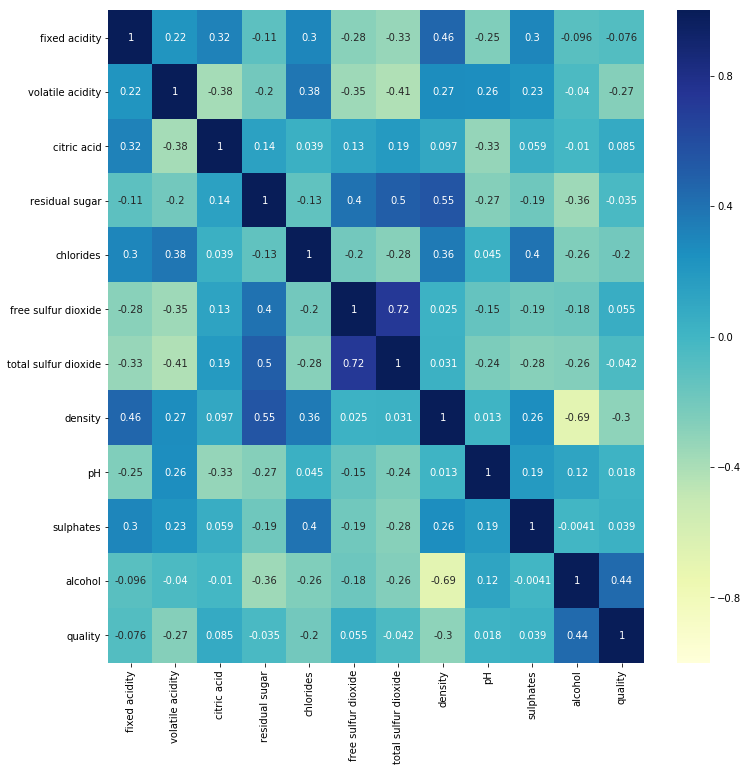

In [40]:
plt.figure(figsize=(12, 12))
sns.heatmap(data.corr(),annot=True,vmin=-1,cmap='YlGnBu')

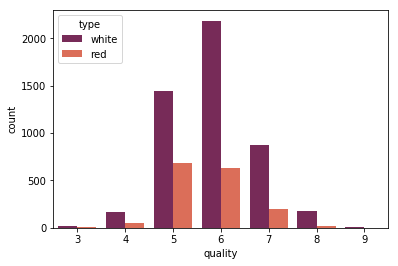

In [41]:
sns.countplot(x = data.quality, data=data, hue='type', palette="rocket")

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


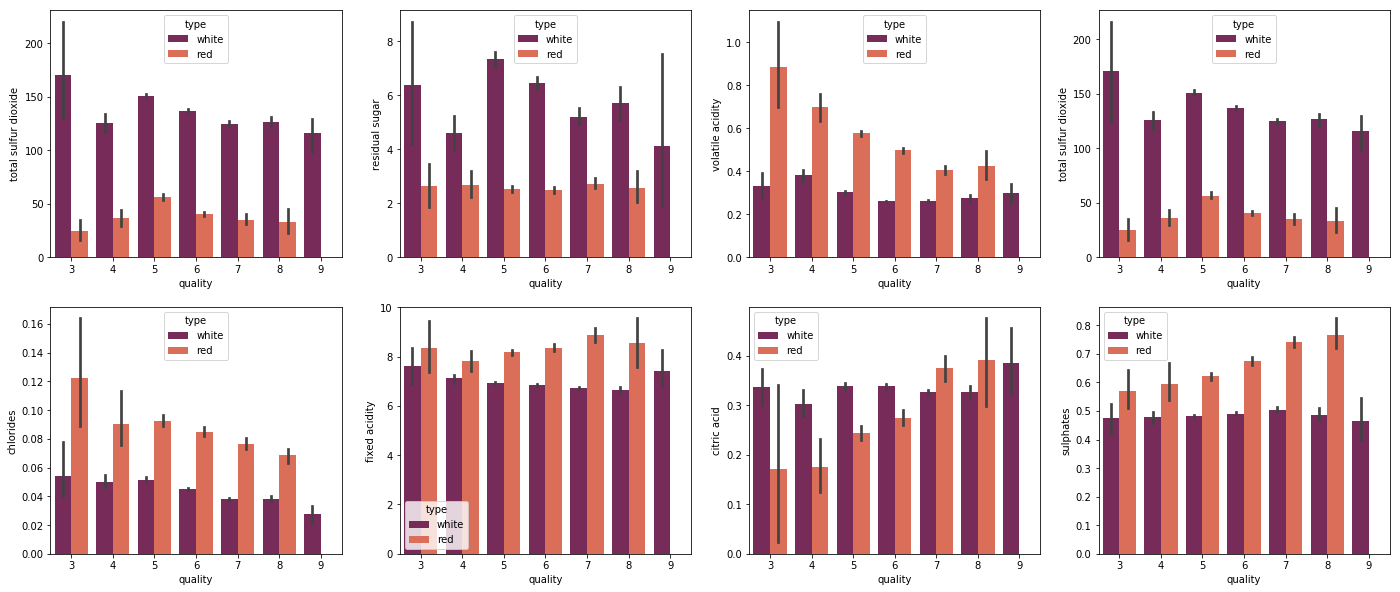

In [42]:
fig = plt.figure(figsize=(24,10))
features = ["total sulfur dioxide", "residual sugar", "volatile acidity", "total sulfur dioxide", "chlorides", "fixed acidity", "citric acid","sulphates"]

for i in range(8):
    ax1 = fig.add_subplot(2,4,i+1)
    sns.barplot(x='quality', y=features[i],data=data, hue='type', palette='rocket')

In [43]:
#split data as predictors and target

In [44]:
X= data.iloc[ : , 1:14]

In [45]:
X.head(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [46]:
y=data.iloc[:, 0]

In [47]:
y.head(4)

0    white
1    white
2    white
3    white
Name: type, dtype: object

In [48]:
y=y.map({'white':1, 'red':0})

In [49]:
y.dtype

dtype('int64')

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, shuffle=True)

In [51]:
Xgb_pipelist = [('ss', ss() ),
            ('pca', PCA()),
            ('xg',  XGBClassifier(silent = False,
                                  n_jobs=2)        # Specify other parameters here
            )
            ]

In [52]:
Xgb_pipeline=Pipeline(Xgb_pipelist)

In [53]:
#parameter tuning

#grid search

parameters = {'xg__learning_rate':  [0.4, 0.05],
              'xg__n_estimators':   [100,  150],
              'xg__max_depth':      [3,5],
              'pca__n_components' : [5,7]
              }       

In [54]:
#    Create Grid Search object first with all necessary

grid_search = GridSearchCV(Xgb_pipeline,
                   parameters,         
                   n_jobs = 2,         
                   cv =2 ,             
                   verbose =2,      
                   scoring = ['accuracy', 'roc_auc'],  
                   refit = 'roc_auc'   
                   )

In [55]:
#fitting the data
start = time.time()
grid_search.fit(X_train, y_train)   
end = time.time()
(end - start)/60 

Fitting 2 folds for each of 16 candidates, totalling 32 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  32 out of  32 | elapsed:    9.7s finished
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


0.17030385335286458

In [56]:
f"Best score: {grid_search.best_score_} "

'Best score: 0.994253660155116 '

In [57]:
f"Best parameter set {grid_search.best_params_}"

"Best parameter set {'pca__n_components': 7, 'xg__learning_rate': 0.05, 'xg__max_depth': 5, 'xg__n_estimators': 100}"

([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

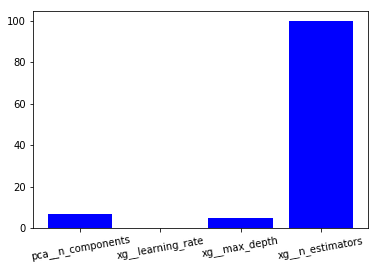

In [58]:
plt.bar(grid_search.best_params_.keys(), grid_search.best_params_.values(), color='b')
plt.xticks(rotation=10)

In [59]:
y_pred = grid_search.predict(X_test)
y_pred

/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([1, 1, 1, ..., 1, 1, 0])

In [60]:
accuracy = accuracy_score(y_test, y_pred)

In [61]:
f"Accuracy: {accuracy * 100.0}"

'Accuracy: 98.91696750902527'

In [62]:
Xgb_pipelist = [('sts', ss() ),
            ('pca', PCA()),
            ('xg',  XGBClassifier(silent = False,
                                  n_jobs=2)        # Specify other parameters here
            )
            ]

In [63]:
Xgb_pipeline=Pipeline(Xgb_pipelist)

In [64]:
#random Search 

parameter_random = {'xg__learning_rate':  uniform(0, 1),
              'xg__n_estimators':   range(50,100),
              'xg__max_depth':      range(3,5),
              'pca__n_components' : range(5,7)}

In [65]:
random_search = RandomizedSearchCV(Xgb_pipeline,
                        param_distributions=parameter_random,
                        scoring= ['roc_auc', 'accuracy'],
                        n_iter=15,          
                        verbose = 3,
                        refit = 'roc_auc',
                        n_jobs = 2,          
                        cv = 2               
                        )

In [66]:
start = time.time()
random_search.fit(X_train, y_train)
end = time.time()
(end - start)/60

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    4.3s finished
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


0.07515977223714193

In [67]:
f"Best score: {random_search.best_score_} "

'Best score: 0.9938199888017917 '

In [68]:
f"Best parameter set: {random_search.best_params_} "

"Best parameter set: {'pca__n_components': 6, 'xg__learning_rate': 0.7839342219934192, 'xg__max_depth': 4, 'xg__n_estimators': 60} "

([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

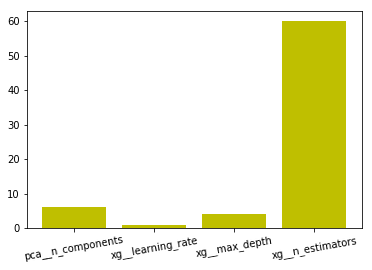

In [69]:
plt.bar(random_search.best_params_.keys(), random_search.best_params_.values(), color='y')
plt.xticks(rotation=10)

In [70]:
y_pred = random_search.predict(X_test)
y_pred

/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([1, 1, 1, ..., 1, 1, 0])

In [71]:
accuracy = accuracy_score(y_test, y_pred)
f"Accuracy: {accuracy * 100.0}"

'Accuracy: 99.32955131511089'

In [72]:
parameter_set = {
           'learning_rate':  (0, 1),                 
           'n_estimators':   (50,100),               
           'max_depth':      (3,5),                 
           'n_components' :  (5,7)          
            }

In [73]:
def xg_eval(learning_rate,n_estimators, max_depth,n_components):
    #  Make pipeline. Pass parameters directly here
    pipe_xg1 = make_pipeline (ss(),                        # Why repeat this here for each evaluation?
                              PCA(n_components=int(round(n_components))),
                              XGBClassifier(
                                           silent = False,
                                           n_jobs=2,
                                           learning_rate=learning_rate,
                                           max_depth=int(round(max_depth)),
                                           n_estimators=int(round(n_estimators))
                                           )
                             )

    # Now fit the pipeline and evaluate
    cv_result = cross_val_score(estimator = pipe_xg1,
                                X= X_train,
                                y = y_train,
                                cv = 2,
                                n_jobs = 2,
                                scoring = 'f1'
                                ).mean()             # take the average of all results


    #  Finally return maximum/average value of result
    return cv_result

In [74]:
bayesian_opt = BayesianOptimization(
                             xg_eval,     
                             parameter_set  
                             )

In [75]:
start = time.time()

In [76]:
bayesian_opt.maximize(init_points=5,
               n_iter=15,        
               )

|   iter    |  target   | learni... | max_depth | n_comp... | n_esti... |
-------------------------------------------------------------------------
|  1        |  0.9914   |  0.5633   |  4.71     |  5.715    |  97.68    |
|  2        |  0.9908   |  0.4419   |  3.564    |  5.374    |  83.16    |
|  3        |  0.991    |  0.1716   |  4.467    |  6.184    |  69.79    |
|  4        |  0.9911   |  0.8298   |  3.796    |  6.326    |  99.34    |
|  5        |  0.9916   |  0.4679   |  4.479    |  5.564    |  77.22    |
|  6        |  0.9895   |  0.07187  |  3.208    |  6.155    |  50.0     |
|  7        |  0.9913   |  0.2046   |  4.945    |  6.233    |  99.99    |
|  8        |  0.9913   |  0.9947   |  3.041    |  5.78     |  99.99    |
|  9        |  0.9905   |  0.6387   |  4.783    |  5.189    |  99.98    |
|  10       |  0.991    |  0.4897   |  4.986    |  5.238    |  50.03    |
|  11       |  0.9917   |  0.3899   |  4.63     |  6.978    |  99.99    |
|  12       |  0.991    |  0.3068   | 

In [77]:
f"Best parameter set: {bayesian_opt.max} "

"Best parameter set: {'target': 0.9920236225399623, 'params': {'learning_rate': 0.718496922228789, 'max_depth': 3.6819470847163194, 'n_components': 6.942040875686766, 'n_estimators': 50.00072802713886}} "

In [78]:
bayesian_opt.max.values()

dict_values([0.9920236225399623, {'learning_rate': 0.718496922228789, 'max_depth': 3.6819470847163194, 'n_components': 6.942040875686766, 'n_estimators': 50.00072802713886}])

In [79]:
for features in bayesian_opt.max.values(): 
    print(features)

0.9920236225399623
{'learning_rate': 0.718496922228789, 'max_depth': 3.6819470847163194, 'n_components': 6.942040875686766, 'n_estimators': 50.00072802713886}


In [80]:
features

{'learning_rate': 0.718496922228789,
 'max_depth': 3.6819470847163194,
 'n_components': 6.942040875686766,
 'n_estimators': 50.00072802713886}

([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

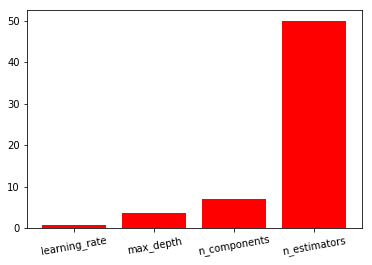

In [81]:
plt.bar(features.keys(), features.values(), color='r')
plt.xticks(rotation=10)

In [82]:
#Fitting parameters into our model and Feature Importance

In [83]:
#Model with parameters of grid search
model_gs = XGBClassifier(
                    learning_rate = grid_search.best_params_['xg__learning_rate'],
                    max_depth = grid_search.best_params_['xg__max_depth'],
                    n_estimators=grid_search.best_params_['xg__n_estimators']
                    )



In [84]:
#Model with parameters of random search
model_rs = XGBClassifier(
                    learning_rate = random_search.best_params_['xg__learning_rate'],
                    max_depth = random_search.best_params_['xg__max_depth'],
                    n_estimators=random_search.best_params_['xg__n_estimators']
                    )



In [85]:
#Model with parameters of bayesian optimization
model_bo = XGBClassifier(
                    learning_rate = int(features['learning_rate']),
                    max_depth = int(features['max_depth']),
                    n_estimators=int(features['n_estimators'])
                    )

In [86]:
start = time.time()
model_gs.fit(X_train, y_train)
model_rs.fit(X_train, y_train)
model_bo.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [87]:
y_pred_gs = model_gs.predict(X_test)
y_pred_rs = model_rs.predict(X_test)
y_pred_bo = model_bo.predict(X_test)

In [88]:
accuracy_gs = accuracy_score(y_test, y_pred_gs)
accuracy_rs = accuracy_score(y_test, y_pred_rs)
accuracy_bo = accuracy_score(y_test, y_pred_gs)

In [89]:
print("Grid search Accuracy: "+str(accuracy_gs))
print("Grid search Accuracy: "+str(accuracy_rs))
print("Bayesian Optimization Accuracy: "+str(accuracy_bo))

Grid search Accuracy: 0.9932955131511089
Grid search Accuracy: 0.997421351211965
Bayesian Optimization Accuracy: 0.9932955131511089


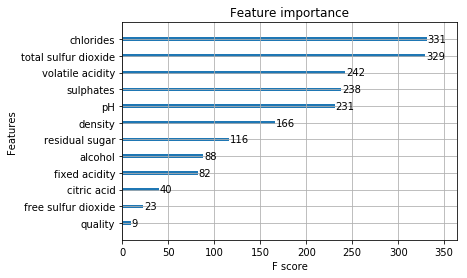

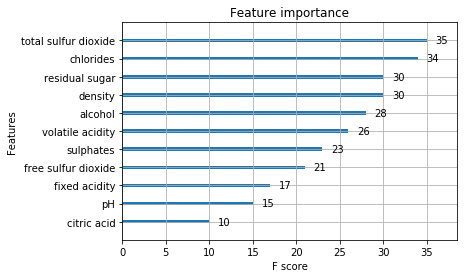

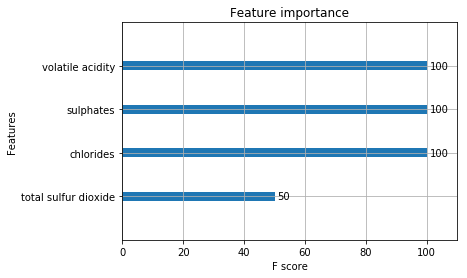

In [90]:
model_gs.feature_importances_
model_rs.feature_importances_
model_bo.feature_importances_
plot_importance(model_gs)
plot_importance(model_rs)
plot_importance(model_bo)
plt.show()